In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.misc
# scipy.misc.imsave('outfile.jpg', image_array)

import numpy as np
import os
import scipy
import imageio

import pickle

In [6]:
f=open('train-1.renju', "r")

data = []
i = 0
for line in f.readlines():
    i += 1
    parsed = line.split(' ')
    data.append(parsed)

In [8]:
def motiontonumber(motion):
    letter = ord(motion[0]) - ord('a')
    if (letter > 8):
        return (letter * 15 - 15 + int(motion[1:]))
    return (letter * 15 + int(motion[1:]))

In [ ]:
def convert(data):
    newdata = []
    for play in data:
        i = 0
        sz = len(play)
        newplay = []
        if (play[0] == "white"):
            newplay.append(0)
        elif (play[0] == "black"):
            newplay.append(1)
        else:
            continue
        for i in range(1, sz):
            newplay.append(motiontonumber(play[i]))
        newdata.append(newplay)
    return newdata

In [ ]:
newdata = convert(data)

In [10]:
# with open("newdata.txt", "wb") as fp:   #Pickling
#     pickle.dump(newdata, fp)
# Unpickling:
with open('newdata.txt', 'rb') as f:
    mynewlist = pickle.load(f)

In [11]:
newdata = mynewlist

In [17]:
X_train = np.zeros((2000000, 15, 15, 1))
Y_train = np.zeros(2000000)
t = 0

In [19]:
# plt.imshow(g, cmap='Greys',  interpolation='nearest')
def createImagesFromPlay(newdata, k, folder, t):
    i = 0
    fname = folder + '/' + str(i) + '.png'
    initial = np.zeros((15, 15), dtype=np.uint8)
    for move in newdata[k]:
        if (i == 0):
            i += 1
            continue
        fname = folder + '/' + str(i - 1) + '.png'
        if (t < 2000000):
            reshaped = np.zeros((15, 15, 1), dtype=np.uint8)
            reshaped[:, :, 0] = initial[:, :]
            X_train[t] = reshaped
            Y_train[t] = move
            t += 1
        initial[move // 15][move % 15] = 128 + 127*(i%2)
        i += 1
        imageio.imsave(fname, initial)
    return t

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

In [21]:
def createAllImages(newdata, t):
    for i in range(50000):
        folder = str(i)
        if (not(i % 500)):
            print(str(i / 500), " PERCENT IS DONE ")
        if not os.path.exists('C:/Users/777/Desktop/Renju/plays/' + folder):
            os.makedirs('C:/Users/777/Desktop/Renju/plays/' + folder)
        t = createImagesFromPlay(newdata, i, ('C:/Users/777/Desktop/Renju/plays/' + folder), t)

In [22]:
createAllImages(newdata, 0)

0.0  PERCENT IS DONE 
1.0  PERCENT IS DONE 
2.0  PERCENT IS DONE 
3.0  PERCENT IS DONE 
4.0  PERCENT IS DONE 
5.0  PERCENT IS DONE 
6.0  PERCENT IS DONE 
7.0  PERCENT IS DONE 
8.0  PERCENT IS DONE 
9.0  PERCENT IS DONE 
10.0  PERCENT IS DONE 
11.0  PERCENT IS DONE 
12.0  PERCENT IS DONE 
13.0  PERCENT IS DONE 
14.0  PERCENT IS DONE 
15.0  PERCENT IS DONE 
16.0  PERCENT IS DONE 
17.0  PERCENT IS DONE 
18.0  PERCENT IS DONE 
19.0  PERCENT IS DONE 
20.0  PERCENT IS DONE 
21.0  PERCENT IS DONE 
22.0  PERCENT IS DONE 
23.0  PERCENT IS DONE 
24.0  PERCENT IS DONE 
25.0  PERCENT IS DONE 
26.0  PERCENT IS DONE 
27.0  PERCENT IS DONE 
28.0  PERCENT IS DONE 
29.0  PERCENT IS DONE 
30.0  PERCENT IS DONE 
31.0  PERCENT IS DONE 
32.0  PERCENT IS DONE 
33.0  PERCENT IS DONE 
34.0  PERCENT IS DONE 
35.0  PERCENT IS DONE 
36.0  PERCENT IS DONE 
37.0  PERCENT IS DONE 
38.0  PERCENT IS DONE 
39.0  PERCENT IS DONE 
40.0  PERCENT IS DONE 
41.0  PERCENT IS DONE 
42.0  PERCENT IS DONE 
43.0  PERCENT IS DONE

 If image N in folder M, then the next move is data[M][N] (because data[M][0] is a winner of the round and numeration of images starts from 1)

In [23]:
np.save('X_train.npy', X_train)
np.save('Y_train.npy', Y_train)

# START HERE

In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')

In [3]:
Y_train_vec = np.zeros((1000000, 225))
i = 0
for y in Y_train[:1000000]:
    Y_train_vec[i][int(y)] = 1
    i += 1

In [4]:
X_train = X_train/256

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

c:\users\777\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:


# Generate dummy data

model = Sequential()
model.add(Conv2D(32, (2, 2), padding='same',
                 input_shape=(15, 15, 1)))
model.add(LeakyReLU())
model.add(Conv2D(64, (2, 2)))
model.add(LeakyReLU())
model.add(BatchNormalization(axis=3))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(128, (5, 5)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=3))

model.add(Flatten())
model.add(Dense(600))
model.add(LeakyReLU())
model.add(Dense(225))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 32)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 128)       0         
__________

In [7]:
model.fit(X_train[:1000000], Y_train_vec, epochs=2, batch_size=64)

Epoch 1/2
1000000/1000000 [==============================] - 357s 357us/step - loss: 2.8642 - acc: 0.2780
Epoch 2/2
1000000/1000000 [==============================] - 321s 321us/step - loss: 2.1615 - acc: 0.4136


In [8]:
model.fit(X_train[:1000000], Y_train_vec, epochs=2, batch_size=128)

Epoch 1/2
1000000/1000000 [==============================] - 235s 235us/step - loss: 1.9455 - acc: 0.4548
Epoch 2/2
1000000/1000000 [==============================] - 232s 232us/step - loss: 1.8661 - acc: 0.4708


In [9]:
model.fit(X_train[:1000000], Y_train_vec, epochs=2, batch_size=256)

Epoch 1/2
1000000/1000000 [==============================] - 184s 184us/step - loss: 1.7240 - acc: 0.5016s - los - ETA: 1s - loss: 1.7237 - ac - ETA: 0s - loss: 1.7239 - acc:
Epoch 2/2
1000000/1000000 [==============================] - 184s 184us/step - loss: 1.6782 - acc: 0.5105s - loss: 1.6770


In [10]:
model.fit(X_train[:1000000], Y_train_vec, epochs=2, batch_size=2048)

Epoch 1/2
1000000/1000000 [==============================] - 154s 154us/step - loss: 1.4812 - acc: 0.5617
Epoch 2/2
1000000/1000000 [==============================] - 152s 152us/step - loss: 1.4421 - acc: 0.5717


In [11]:
model.save('model.h5')

### START HERE FOR LOADING MODEL

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
from keras.models import load_model
model = load_model('model.h5')

In [7]:
def image_predict(model, pos, i):
    vec = model.predict(pos)
#     move = np.argmax(model.predict(pos)
    move = 0
    xy = 0
    for m in vec[0]:
        if (m > move) and (pos[i][xy // 15][xy % 15][0] == 0):
            move = xy
        xy += 1
    image = np.zeros((15, 15))
    for k in range(15):
        for j in range(15):
            image[k][j] = pos[i][k][j][0]
    image[move // 15][move % 15] = 255
    plt.imshow(image)
    return image

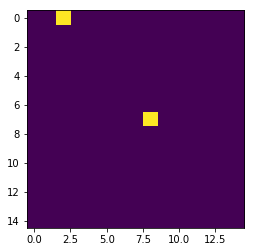

In [8]:
image = image_predict(model, pos, 0)

In [9]:
def self_play_for_n(model, n):
    image = np.zeros((15, 15), dtype=np.uint8)
    pos = np.zeros((1, 15, 15, 1))
    for i in range(n):
#         move = np.argmax(model.predict(pos))
        vec = model.predict(pos)
        maxmove = 0
        move = 0
        xy = 0
        for m in vec[0]:
            if ((m > maxmove) and (pos[0][xy // 15][xy % 15][0] == 0)):
                move = xy
                maxmove = m
            xy += 1
        image[move // 15][move % 15] = 127 + 128 * (i % 2)
        pos[0][move // 15][move % 15][0] = ((127 + 128 * (i % 2)) / 256)
        print(str(i + 1) , " MOVE : ", str(move // 15), " ", str(move % 15))
    plt.imshow(image)

1  MOVE :  7   8
2  MOVE :  6   7
3  MOVE :  5   8
4  MOVE :  4   7
5  MOVE :  5   7
6  MOVE :  5   6
7  MOVE :  6   5
8  MOVE :  4   8
9  MOVE :  4   6
10  MOVE :  3   5
11  MOVE :  4   5
12  MOVE :  5   10
13  MOVE :  4   10
14  MOVE :  3   8
15  MOVE :  2   9
16  MOVE :  3   9
17  MOVE :  3   7
18  MOVE :  4   9
19  MOVE :  6   11
20  MOVE :  2   8
21  MOVE :  1   7
22  MOVE :  2   10
23  MOVE :  1   11
24  MOVE :  1   6
25  MOVE :  2   7
26  MOVE :  1   8
27  MOVE :  1   9
28  MOVE :  3   3
29  MOVE :  4   3
30  MOVE :  5   4
31  MOVE :  4   4
32  MOVE :  4   2
33  MOVE :  2   3
34  MOVE :  2   4
35  MOVE :  1   5
36  MOVE :  5   5
37  MOVE :  5   3
38  MOVE :  4   11
39  MOVE :  3   12
40  MOVE :  4   13


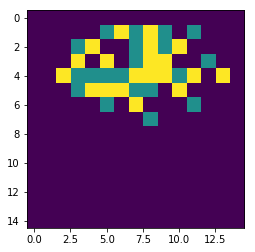

In [10]:
self_play_for_n(model, 40)